In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.preprocessing import LabelEncoder
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
round (data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [4]:
round (data.describe(exclude = ['int64', 'float']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [5]:
data["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='age'>

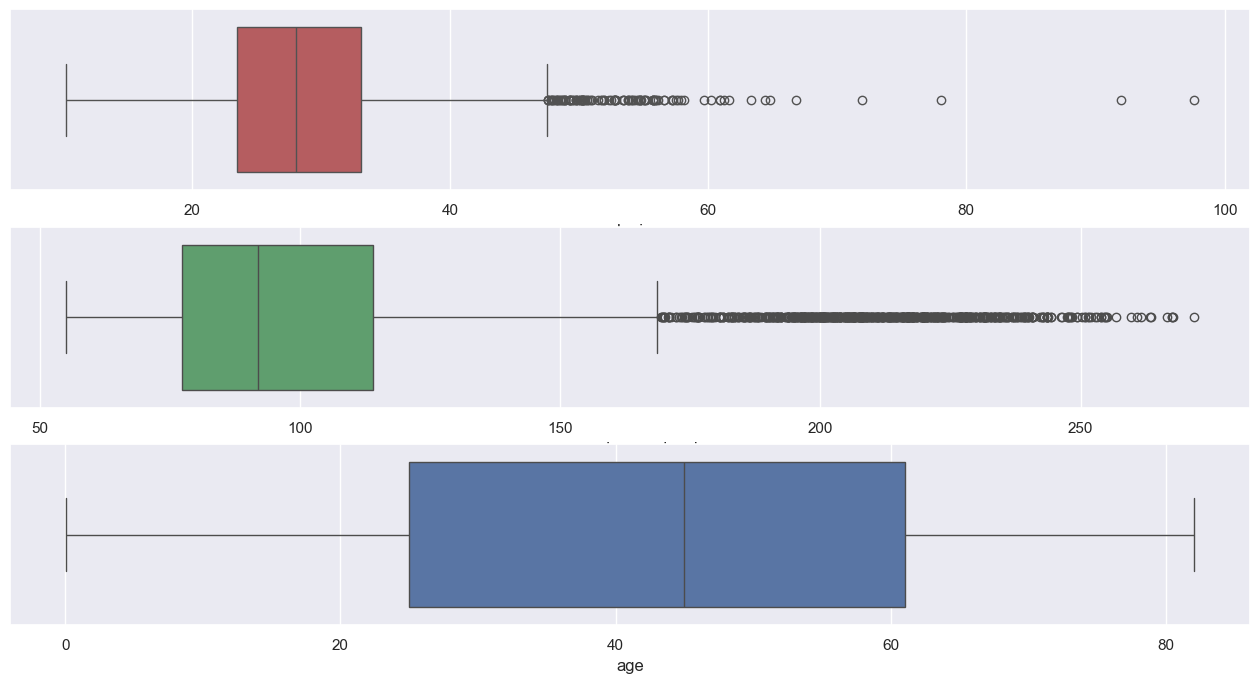

In [6]:
numdata = pd.DataFrame(data[["avg_glucose_level", "bmi", "age"]])
catdata = pd.DataFrame(data[["smoking_status", "heart_disease", "hypertension", "stroke"]])

f, axes= plt.subplots(3, 1, figsize=(16, 8))
sb.boxplot(data=numdata["bmi"], orient="h", color="r", ax=axes[0])
sb.boxplot(data=numdata["avg_glucose_level"], color="g", orient="h", ax=axes[1])
sb.boxplot(data=numdata["age"], orient="h", color="b", ax=axes[2])

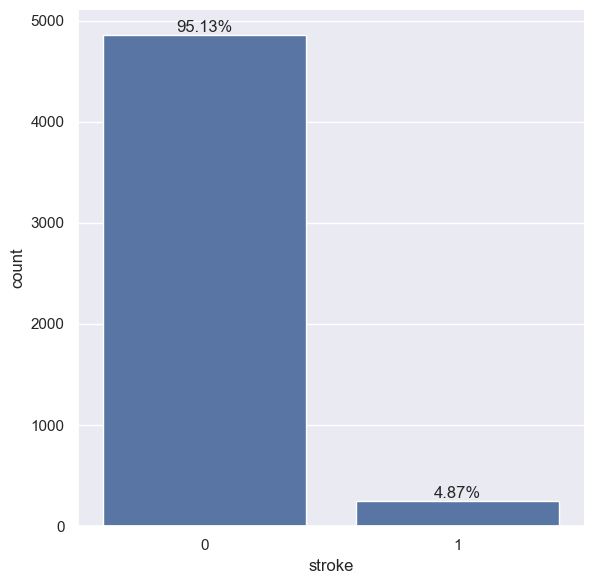

In [7]:
f = sb.catplot(x = "stroke", data = catdata, kind = "count", height=6)

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [8]:
data["smoking_status"].describe()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

In [9]:
smoking = pd.DataFrame(data[["smoking_status"]])

for i in smoking:
    unknowns = smoking[(smoking[i] == "Unknown")]
    smoking_data = smoking.drop(unknowns.index)

smoking_data.value_counts()

smoking_status 
never smoked       1892
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [10]:
sdata = smoking_data.replace('never smoked', 0)
clean_smoking_data = sdata.replace(['formerly smoked', 'smokes'], 1)

clean_smoking_data.value_counts()

C:\Users\thous\AppData\Local\Temp\ipykernel_11828\1298153781.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_smoking_data = sdata.replace(['formerly smoked', 'smokes'], 1)


smoking_status
0                 1892
1                 1674
Name: count, dtype: int64

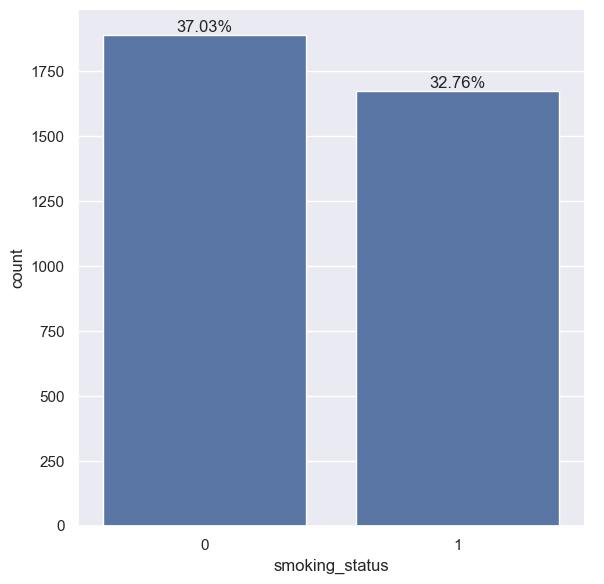

In [11]:
f = sb.catplot(x = "smoking_status", data = clean_smoking_data, kind = "count", height=6)

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [12]:
data[["work_type"]].value_counts()

work_type    
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [13]:
data[["ever_married"]].value_counts()

ever_married
Yes             3353
No              1757
Name: count, dtype: int64

In [14]:
data[["gender"]].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [15]:
gender = pd.DataFrame(data[["gender"]])

for i in gender:
    others = gender[(gender[i] == "Other")]
    gender_data = gender.drop(others.index)

label = LabelEncoder()
gender_data["gender"] = label.fit_transform(gender_data["gender"].astype("str"))

gender_data.value_counts()

gender
0         2994
1         2115
Name: count, dtype: int64

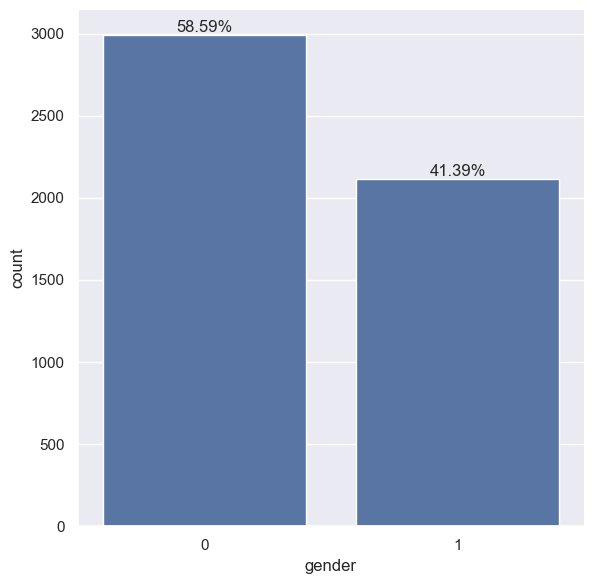

In [16]:
f = sb.catplot(x = "gender", data = gender_data, kind = "count", height=6)

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [17]:
data[["Residence_type"]].value_counts()

Residence_type
Urban             2596
Rural             2514
Name: count, dtype: int64